In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

'\nIn below graph, we can see that there are 8 variables, \nin which 3 variables(Address, Email, Avatar) are categorical \nand 5 are numerical(continuous) variables.\n'

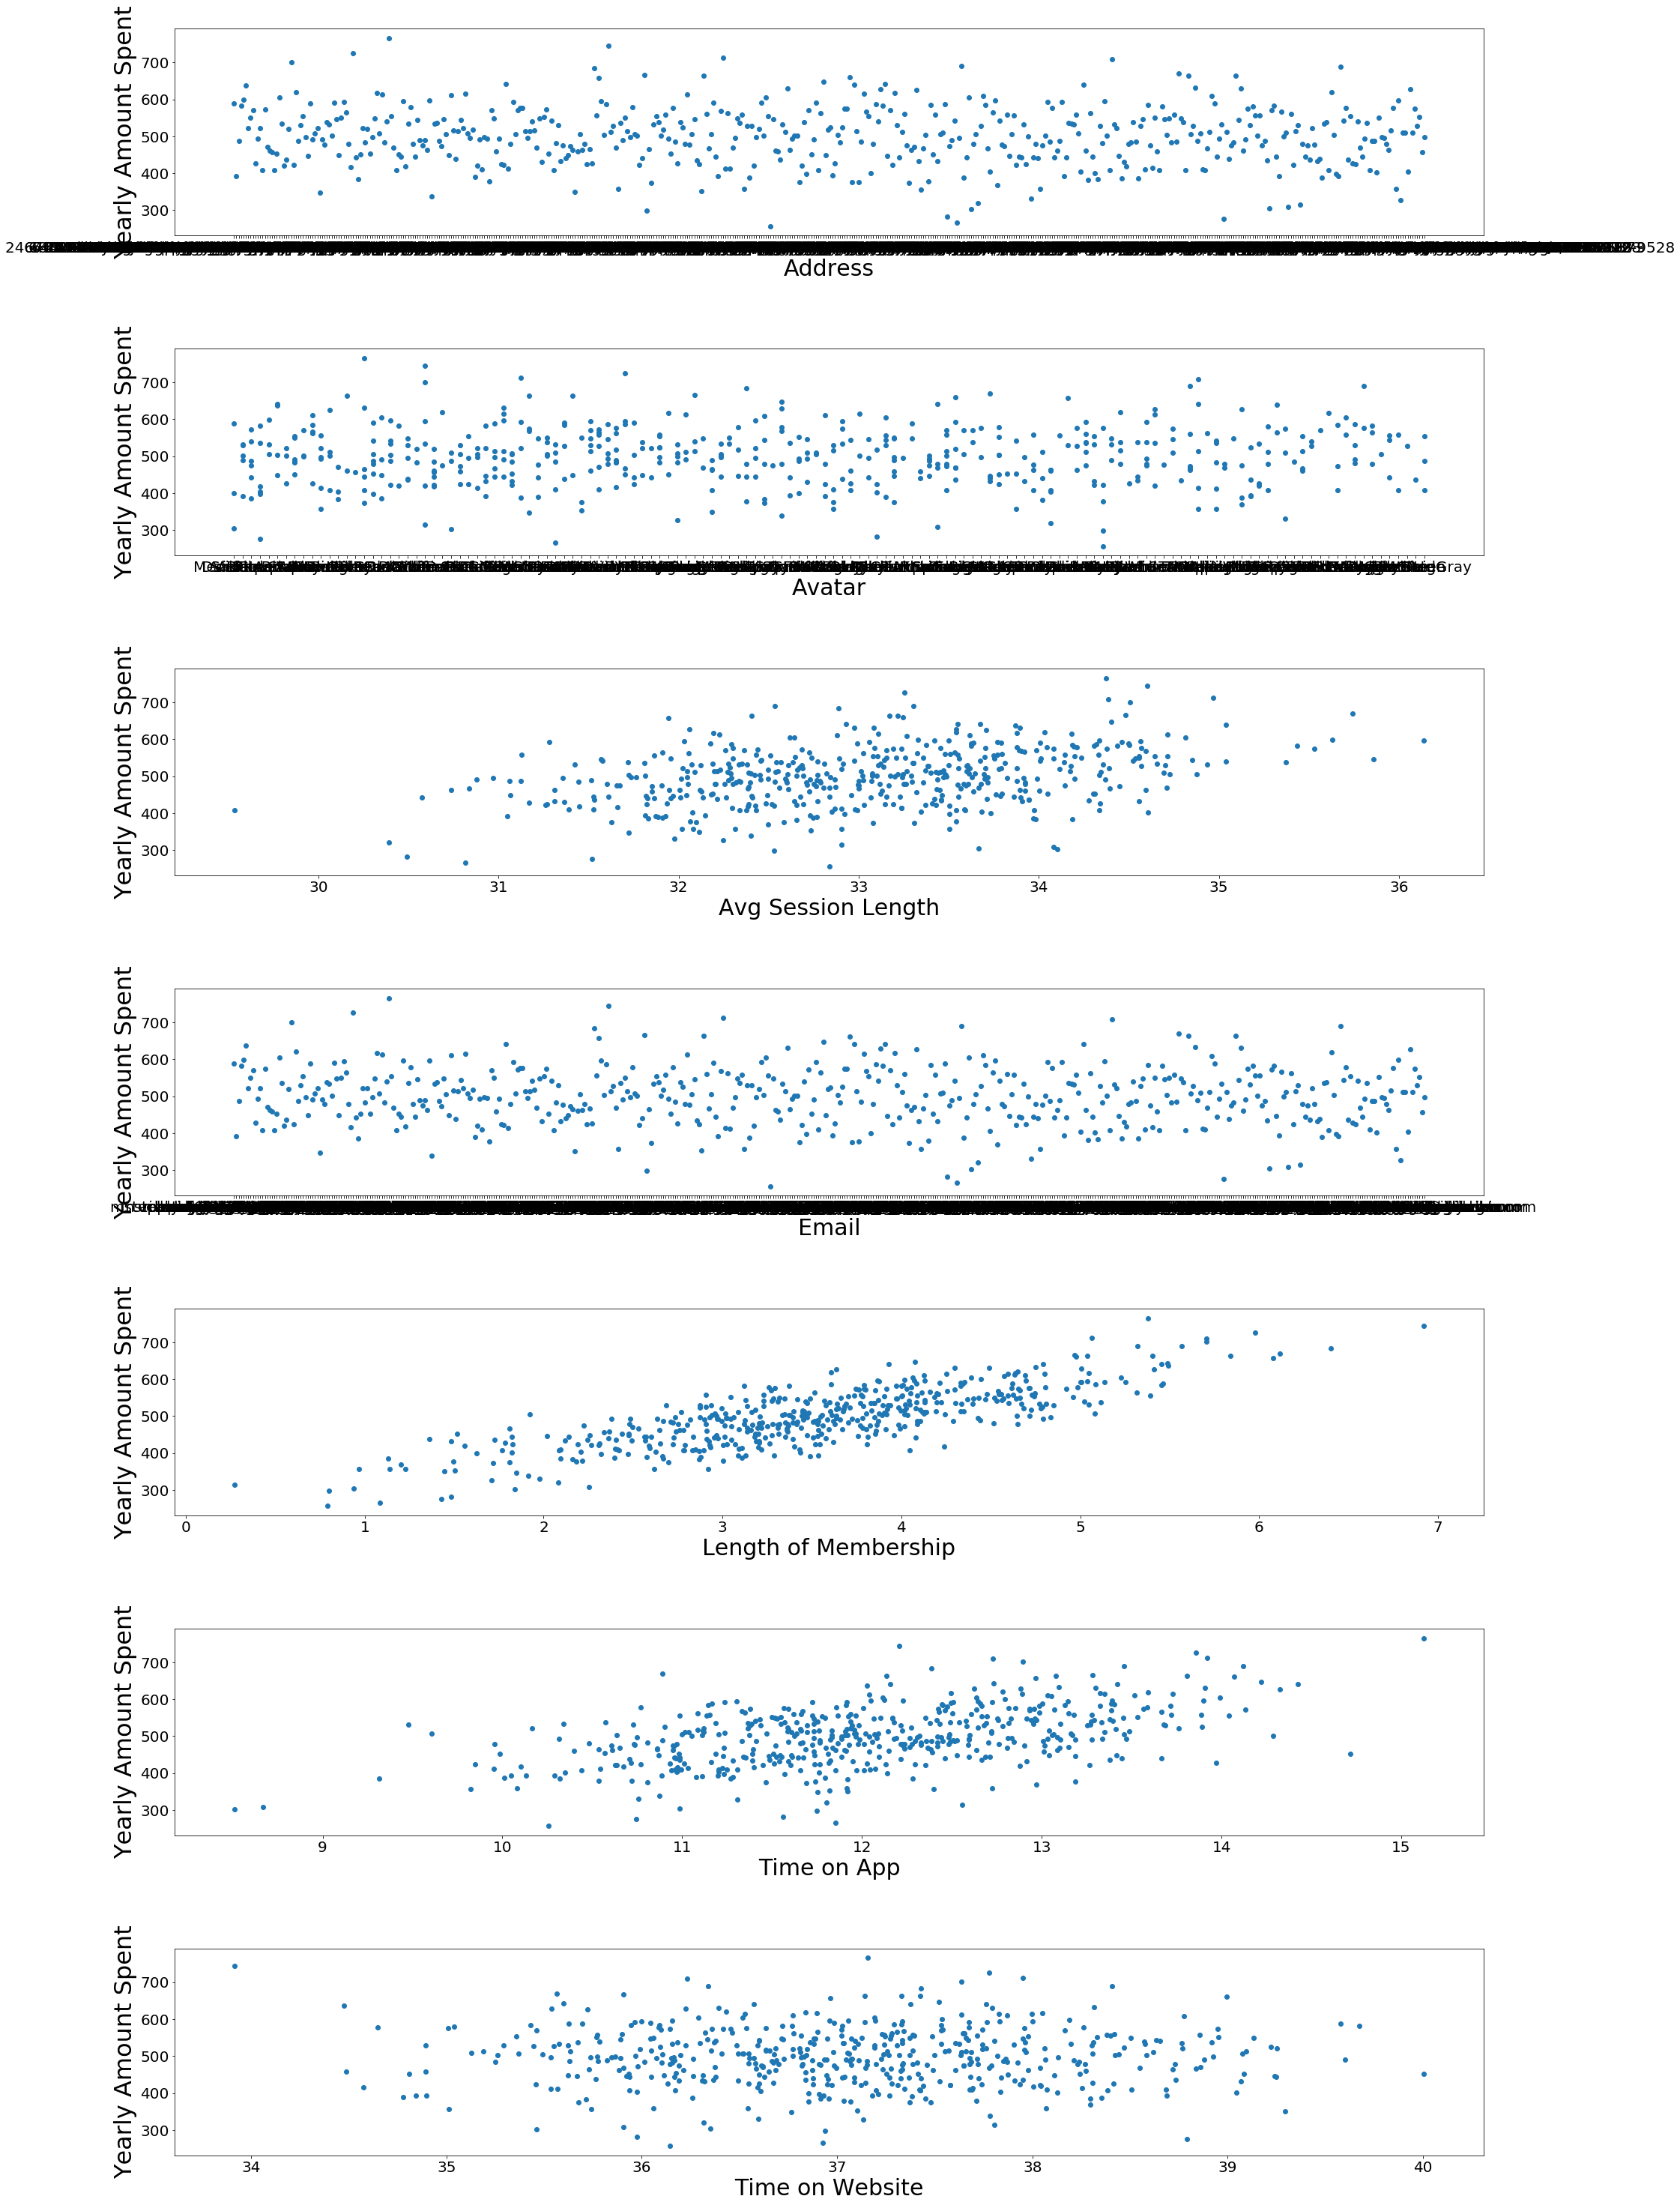

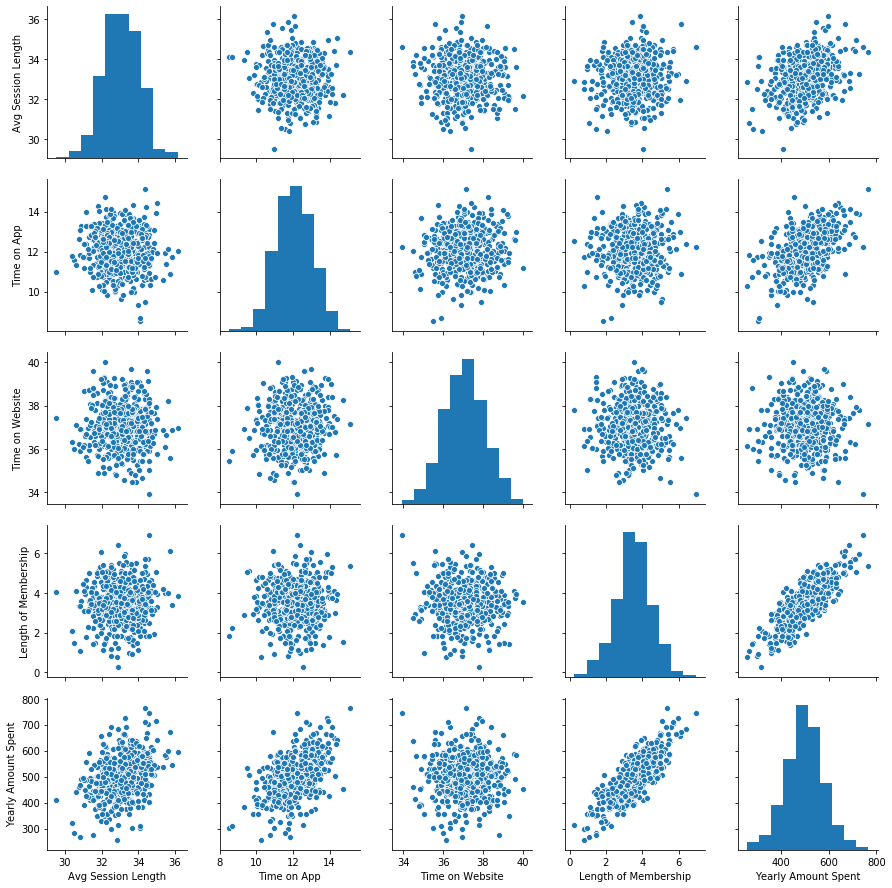

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

df = pd.read_csv('Ecommerce.csv')
target_col_name = 'Yearly Amount Spent'

def subplot_by_target_features(df, target_col_name):
    col_len = len(df.columns)
    target_data = df[target_col_name]
    feauture_col_names = df.columns.difference([target_col_name])
    feature_data = df[feauture_col_names]

    #picture the subplots
    fig, axs = plt.subplots(col_len - 1, 1)
    fig.set_figwidth(25)
    fig.set_figheight(40)
    fig.tight_layout(h_pad = 13)

    for i in range(0, col_len - 1):
        axs[i].scatter(feature_data.iloc[ : , i], target_data)
        axs[i].set_xlabel(feauture_col_names[i], fontsize=30)
        axs[i].set_ylabel(target_col_name, fontsize=32)
        axs[i].tick_params(axis='both', which='major', labelsize=20)
subplot_by_target_features(df, target_col_name)
#second version
sns.pairplot(df)
"""
In below graph, we can see that there are 8 variables, 
in which 3 variables(Address, Email, Avatar) are categorical 
and 5 are numerical(continuous) variables.
"""

### Get rid of non-numerical columns of the dataset

In [4]:
import numpy as np 

df_quantitative = df.select_dtypes([np.number])
df_quantitative

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

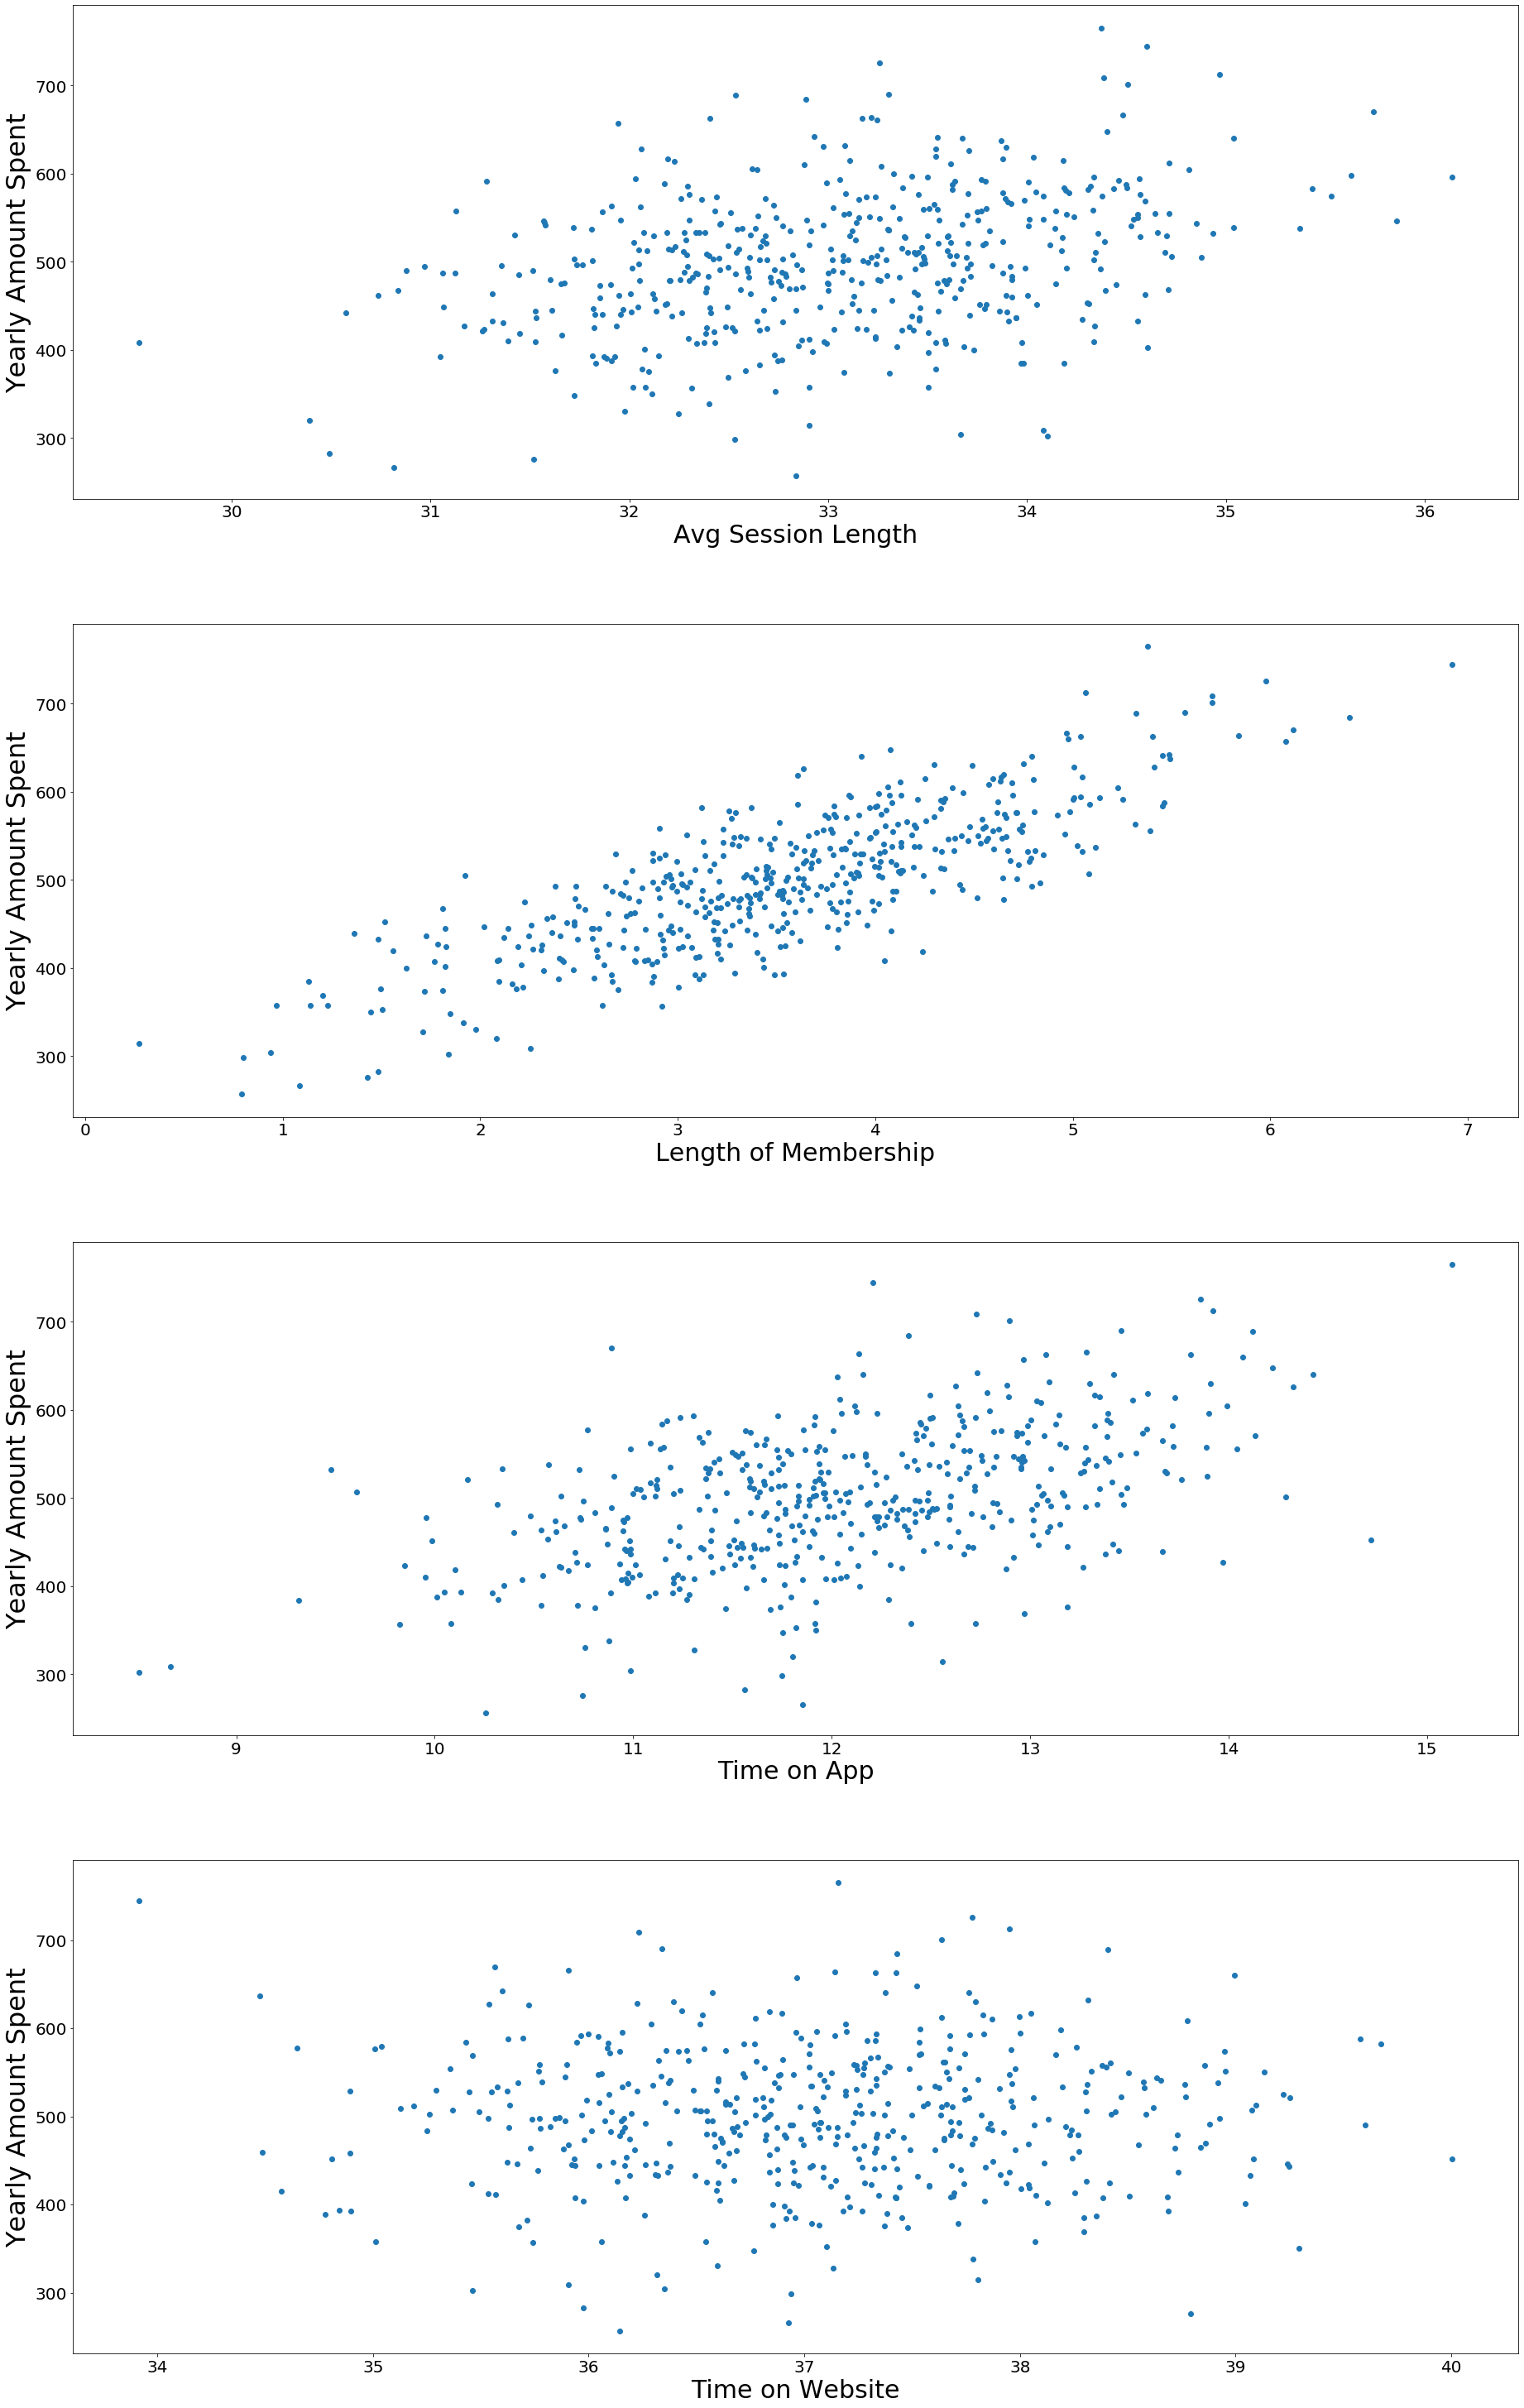

In [19]:
subplot_by_target_features(df_quantitative, target_col_name) 

### Leave only one feature that has a linear relationship with the target variable.

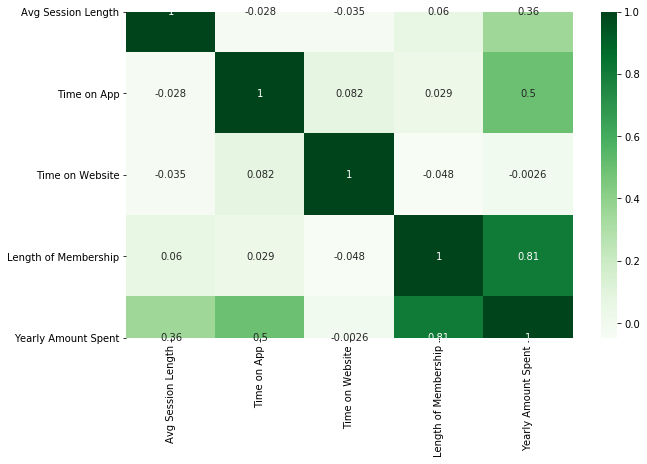

very_high_correlation:  []
high_correlation:  ['Length of Membership']
moderate_correlation:  []
low_correlation:  ['Avg Session Length', 'Time on App']
negligible_correlation (which must be excluded):  ['Time on Website']
best_feature:  Length of Membership


Length of Membership    0.809084
Name: Yearly Amount Spent, dtype: float64

In [5]:
import seaborn as sns 

df.corr()

plt.figure(figsize=(10,6))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap=plt.cm.Greens)
plt.show()

cor_target = abs(df_corr[target_col_name])
#exclude the same ('Yearly Amount Spent') feature 
cor_target = cor_target[:-1]

#Selecting correlated features
very_high_correlation = cor_target[(cor_target >= 0.9) & (cor_target <= 1)]
high_correlation = cor_target[(cor_target >= 0.7) & (cor_target < 0.9)]
moderate_correlation = cor_target[(cor_target >= 0.5) & (cor_target < 0.7)]
low_correlation = cor_target[(cor_target >= 0.3) & (cor_target < 0.5)]
negligible_correlation = cor_target[(cor_target < 0.3)]
print('very_high_correlation: ', very_high_correlation.index.tolist())
print('high_correlation: ', high_correlation.index.tolist())
print('moderate_correlation: ', moderate_correlation.index.tolist())
print('low_correlation: ', low_correlation.index.tolist())
print('negligible_correlation (which must be excluded): ', negligible_correlation.index.tolist())
"""
 From looking to the patterns of the scatter plots, we can conclude the following:
1.If we draw a straight line on scatter plots that is as close to all the data 
    points as possible, the data points of 'Length of Membership' 
    vs 'Yearly Amount Spent' graphic will best match to that line(linear relationship). 
    They are more compact and more evenly distributed across that line than other data points.    
2.From the correlation heatmap we see the highest correlation is the
  best feature which correlation value is 0.809084 
  (strong positive linear relationship (when 'Length of Membership' 
  increases 'Yearly Amount Spent'  also increases)) is in 
  high correlation range [0.8, 0.9)
"""

best_feature = cor_target.idxmax()
print('best_feature: ', best_feature)
high_correlation

### Divide the dataset into training and test sets with the ratio 80:20.

In [7]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(df[best_feature], df[target_col_name], test_size=0.2, random_state=42)
print('Dataset length: ', len(df))
print('\n', xTrain,'\n', xTest)
print('\n', yTrain,'\n', yTest)

Dataset length:  500

 249    3.634996
433    2.117383
19     4.064549
322    4.086566
332    2.190132
         ...   
106    3.781823
270    3.275734
348    3.128639
435    3.762070
102    2.586968
Name: Length of Membership, Length: 400, dtype: float64 
 361    3.434560
73     3.851579
374    4.238296
155    2.941411
104    3.428860
         ...   
347    5.137817
86     2.669942
75     3.120569
438    3.535088
15     3.357847
Name: Length of Membership, Length: 100, dtype: float64

 249    518.786483
433    434.144202
19     605.061039
322    478.262126
332    424.202827
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 400, dtype: float64 
 361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64


### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [8]:
import numpy as np
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    data_vector = np.array(data_vector)
    response_vector = np.array(response_vector)
    n = len(data_vector)
    k = 1 #independent feature count
    data_vector = data_vector.reshape((n, k))
    #add ones column for intercept
    data_vector = np.c_[np.ones(data_vector.shape[0]), data_vector]
    x_T = data_vector.T
    dot_product = x_T.dot(data_vector)
    inverse = np.linalg.inv(dot_product)
    beta = inverse.dot(x_T.dot(response_vector))
    
    return beta

beta0, beta1 = fit_1d_linear_regression(xTrain, yTrain)
print('beta0: ', beta0)
print('beta1: ', beta1)
#YearlyAmountSpent = 271.35211 + 64.64010065*LengthOfMembership
"""
Interpretation
For every 1 year Length of Memebrship, we would expect 
the Yearly Amount Spent to increase by 64.64 unit($)
"""

beta0:  271.35211280339354
beta1:  64.64010065386697


'\nInterpretation\nFor every 1 year Length of Memebrship, we would expect \nthe Yearly Amount Spent to increase by 64.64 unit($)\n'

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

Test Set: 


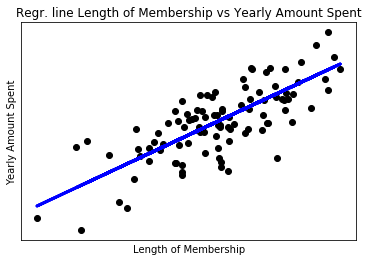

Train Set: 


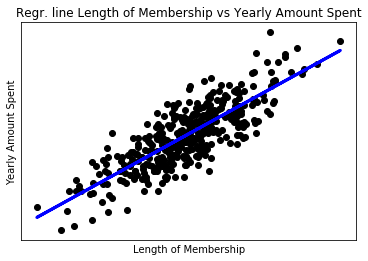

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

xTrain = np.array(xTrain).reshape(-1, 1)
yTrain = np.array(yTrain).reshape(-1, 1)
xTest = np.array(xTest).reshape(-1, 1)
yTest = np.array(yTest).reshape(-1, 1)

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)

def plot_fitted_line(b1,
                     x,
                     y,
                     username: str,
                     b0 = 0):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    #create scatter plot
    plt.scatter(x, y, c='k')
    plt.xlabel(best_feature)
    plt.ylabel(target_col_name)
    #add line 
    plt.plot(x, b0 + b1*x, c='b', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.title('Regr. line %s vs %s' % (best_feature, target_col_name))
    plt.show()
    #save the picture of the graph
    plt.savefig(username + '.png')
    pass

y_pred_sklearn_test = regr.predict(xTest)
y_pred_sklearn_train = regr.predict(xTrain)
y_train_pred = beta0 + beta1*xTrain
y_test_pred = beta0 + beta1*xTest
print('Test Set: ')
plot_fitted_line(beta1, xTest, yTest, 'Nune', beta0)
print('Train Set: ')
plot_fitted_line(beta1, xTrain, yTrain, 'Nune', beta0)

### Plot example

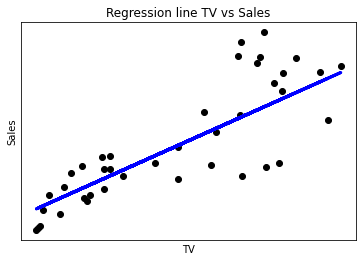

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain, yTrain)

print(beta0)
print(beta1)
print(regr.coef_, regr.intercept_)
# they are almost the same
print(abs(beta0 - regr.intercept_))
print(abs(beta1 - regr.coef_.flatten()))

271.35211280339354
64.64010065386697
[[64.64010065]] [271.3521128]
[3.97903932e-13]
[1.27897692e-13]


### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

Test Set: 
my function test set metrics: 
 [['Mean absolute error: 37.84']
 ['Mean squared error: 2162.11']
 ['Root mean squared error: 46.50']
 ['R-squared: 0.56']
 ['R-squared-adjusted: 0.56']]
sklearn function test set metrics: 
 [['Mean absolute error: 37.84']
 ['Mean squared error: 2162.11']
 ['Root mean squared error: 46.50']
 ['R-squared: 0.56']
 ['R-squared-adjusted: 0.56']]
Train Set: 
my function train set metrics: 
 [['Mean absolute error: 37.33']
 ['Mean squared error: 2170.45']
 ['Root mean squared error: 46.59']
 ['R-squared: 0.67']
 ['R-squared-adjusted: 0.67']]
sklearn function train set metrics: 
 [['Mean absolute error: 37.33']
 ['Mean squared error: 2170.45']
 ['Root mean squared error: 46.59']
 ['R-squared: 0.67']
 ['R-squared-adjusted: 0.67']]


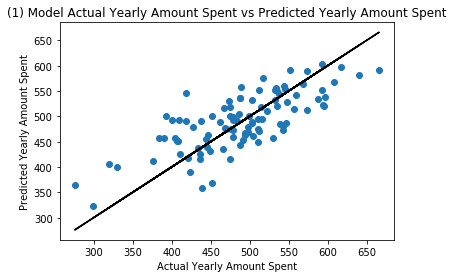

'\nRMSE is that the fact that the errors are squared means that a much larger weight is assigned to larger errors.\nMSE tells you how close a regression line is to a set of points. In our case it is \nHigh r-squared-adjusted indicates a better fit for the model. In our case it is 56%,\nwhich indicates that 56% of the data fit the regression model.\n'

In [19]:
independent_var_count = 1 # one independent variable 'Length of Membership'

def r_squared_adjusted(n, k, r_sqaured):
    return 1 - ((1 - r_sqaured)*(n-1)/(n-k-1))
    

def describe_error_metrics(y_data, y_pred_data, independent_var_count):
    r_squared = r2_score(y_data, y_pred_data)
    
    return np.array(pd.DataFrame(['Mean absolute error: %.2f'
      % mean_absolute_error(y_data, y_pred_data),
                    'Mean squared error: %.2f'
      % mean_squared_error(y_data, y_pred_data),
                    'Root mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_data, y_pred_data)),
                    'R-squared: %.2f'
      % r_squared,
                    'R-squared-adjusted: %.2f'
      % r_squared_adjusted(len(y_data), independent_var_count, r_squared)]))


print('Test Set: ')
print('my function test set metrics: \n', 
      describe_error_metrics(yTest, y_test_pred, independent_var_count))
print('sklearn function test set metrics: \n',
      describe_error_metrics(yTest, y_pred_sklearn_test, independent_var_count))
print('Train Set: ')
print('my function train set metrics: \n',
      describe_error_metrics(yTrain, y_train_pred, independent_var_count))
print('sklearn function train set metrics: \n', 
      describe_error_metrics(yTrain, y_pred_sklearn_train, independent_var_count))

plt.scatter(yTest, y_pred_sklearn_test)
plt.plot(yTest, yTest, color='k')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('(1) Model Actual Yearly Amount Spent vs Predicted Yearly Amount Spent')
plt.show()
"""
RMSE is that the fact that the errors are squared means that a much larger weight is assigned to larger errors.
MSE tells you how close a regression line is to a set of points. In our case it is 
High r-squared-adjusted indicates a better fit for the model. In our case it is 56%,
which indicates that 56% of the data fit the regression model.
"""


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [17]:
"""
From the correlation heat map and scaterrplot we see that only 
'Time on Website' correlation with 'Yearly Amount Spent' 
is very low (negligable) and we can exclude it 
"""
new_data = df[['Time on App', 'Length of Membership', 'Avg Session Length']]
print(new_data)

xTrain1, xTest1, yTrain1, yTest1 = train_test_split(new_data, df[target_col_name], test_size=0.2, random_state=42)
regr1 = linear_model.LinearRegression()
# Train the model using the training data
regr1.fit(xTrain1, yTrain1)

print(regr1.coef_)
print(regr1.intercept_)
y_pred_sk_test = regr1.predict(xTest1)
y_pred_sk_train = regr1.predict(xTrain1)
print('Test Set: ')
print('sklearn function test set metrics: \n',
      describe_error_metrics(yTest1, y_pred_sk_test, 3))
print('Train Set: ')
print('sklearn function test set metrics: \n', 
      describe_error_metrics(yTrain1, y_pred_sk_train, 3))

     Time on App  Length of Membership  Avg Session Length
0      12.655651              4.082621           34.497268
1      11.109461              2.664034           31.926272
2      11.330278              4.104543           33.000915
3      13.717514              3.120179           34.305557
4      12.795189              4.446308           33.330673
..           ...                   ...                 ...
495    13.566160              3.746573           33.237660
496    11.695736              3.576526           34.702529
497    11.499409              4.958264           32.646777
498    12.391423              2.336485           33.322501
499    12.418808              2.735160           33.715981

[500 rows x 3 columns]
[38.81121741 61.88227895 25.59910468]
-1033.1207980077975
Test Set: 
sklearn function test set metrics: 
 [['Mean absolute error: 8.58']
 ['Mean squared error: 110.32']
 ['Root mean squared error: 10.50']
 ['R-squared: 0.98']
 ['R-squared-adjusted: 0.98']]
Train Set: 

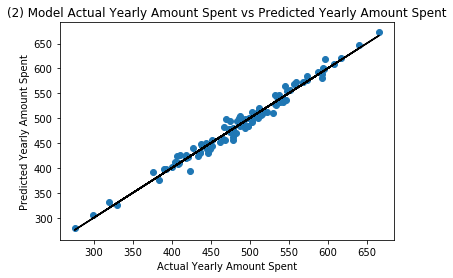

In [20]:
plt.scatter(yTest1, y_pred_sk_test)
plt.plot(yTest1, yTest1, color='k')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('(2) Model Actual Yearly Amount Spent vs Predicted Yearly Amount Spent')
plt.show()
#(2) Actual Yearly Amount Spent and predicted Yearly Amount Spent graphic have almost perfect linearity 
#when we compare (1) and (2) graphics.

In [18]:
# From the metrics of one feature model and many feature graphics we can 
# conclude that the model with only one feature 'Length of Membership' 
# has r-square (56%). 
# Adding other features increased r-square-adjusted to 0.99 (99%) (very good)) and decreased 
# error metrics(RMSE) from 46.59 -> 9.79. Thats why it is the best model.  

In [57]:
# Yearly Amount Spent = -1033.12 + 61.88*(Length of Membership) + 38.81*(Time on App) + 25.6*(Avg. Session Length)
#This means:
#1.If we increase the length of Membership 1 unit(year/month) more and holding all other features fixed, 
# one person will spend 61.88 units($) more.
#2.If we increase the Time on App 1 unit(hours/minutes) more and holding all other features fixed, 
# one person will spend 38.81 units($) more.
#3.If we increase the Avg. Session Length 1 unit(hours/minutes) more and holding all other features fixed, 
# one person will spend 25.6 units($) more.